# Modulo 3 Actividad 1

### Intención del aprendizaje esperado:

1. Utilizar los conceptos básicos de estadística descriptiva para la caracterización de un conjunto de datos de una población.

## Ejercicios Planteados

**Caso:**

En una clínica infantil se ha ido anotando, durante un mes, el número de metros que cada niño anda, seguido y sin caerse, el primer día que comienza a caminar, obteniéndose la tabla de información adjunta:

<img src="TablaFrecuencia3_1.jpg">

**Se pide:**


a) Tabla de Frecuencia. Diagrama de Barras para las frecuencias absolutas, relativas y acumuladas.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt


metros = []
ninnos = [2, 6, 10, 5, 10, 3, 2, 2]
tabla_registros = []


for i in range(1, 9):
    metros.append(i)

for metro, ninnos in zip(metros, ninnos):
    tabla_registros.extend([metro] * ninnos)

# Crear el DataFrame de la tabla de frecuencia
df_tabla_frecuencia = pd.DataFrame(tabla_registros, columns=['Metros'])

# Contar la frecuencia de cada metro y agregarlo como una columna
df_tabla_frecuencia['Niños'] = df_tabla_frecuencia.groupby('Metros')['Metros'].transform('count')

# Eliminar las filas duplicadas para obtener la tabla de frecuencia única
df_tabla_frecuencia = df_tabla_frecuencia.drop_duplicates().reset_index(drop=True)

print(df_tabla_frecuencia)



   Metros  Niños
0       1      2
1       2      6
2       3     10
3       4      5
4       5     10
5       6      3
6       7      2
7       8      2


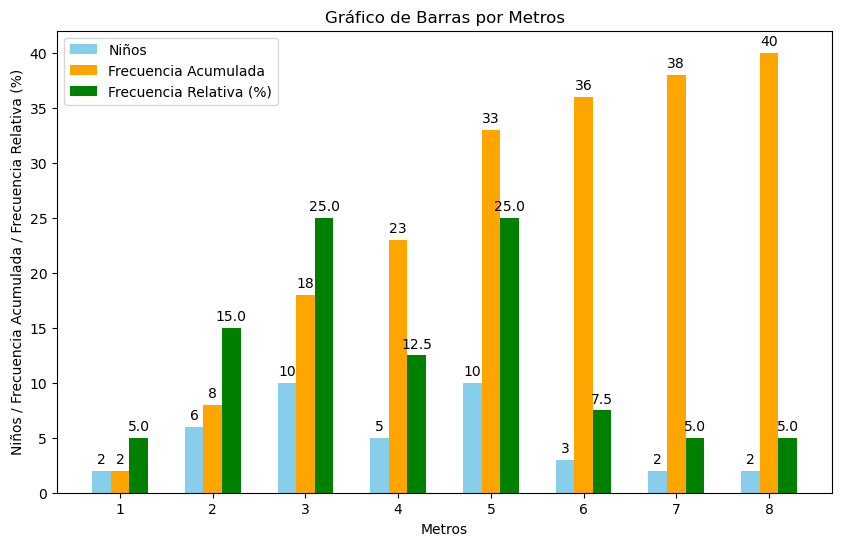

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

cantidad_ninnos = len(tabla_registros)

df_tabla_frecuencia['Frecuencia Relativa'] =  df_tabla_frecuencia['Niños'] / cantidad_ninnos * 100
df_tabla_frecuencia['Frecuencia Acumulada'] = df_tabla_frecuencia['Niños'].cumsum()


fig, ax = plt.subplots(figsize=(10, 6))


bar_width = 0.2
index = np.arange(len(df_tabla_frecuencia['Metros']))


barra_nino = ax.bar(index - bar_width, df_tabla_frecuencia['Niños'], bar_width, label='Niños', color='skyblue')
barra_f_acumulada = ax.bar(index, df_tabla_frecuencia['Frecuencia Acumulada'], bar_width, label='Frecuencia Acumulada', color='orange')
barra_f_relativa = ax.bar(index + bar_width, df_tabla_frecuencia['Frecuencia Relativa'], bar_width, label='Frecuencia Relativa (%)', color='green')


ax.set_xlabel('Metros')
ax.set_ylabel('Niños / Frecuencia Acumulada / Frecuencia Relativa (%)')
ax.set_title('Gráfico de Barras por Metros')
ax.set_xticks(index)
ax.set_xticklabels(df_tabla_frecuencia['Metros'])
ax.legend()

def autolabel(barra):
    for i in barra:
        height = i.get_height()
        ax.annotate('{}'.format(height),
                    xy=(i.get_x() + i.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(barra_nino)
autolabel(barra_f_acumulada)
autolabel(barra_f_relativa)


plt.show()


b) Mediana, media aritmética, moda y cuartiles.


In [83]:
mediana_metros_ninos = np.median(tabla_registros)
media_aritmetica_metros_ninos = np.mean(tabla_registros)

para_moda = pd.Series(tabla_registros)
moda = para_moda.mode()
moda1 = moda[0]
moda2 = moda[1]

para_cuartiles = np.array(tabla_registros)
q1 = np.percentile(para_cuartiles, 25)
q2 = np.percentile(para_cuartiles, 50)
q3 = np.percentile(para_cuartiles, 75)

print(' Medidas de Tendencia Central '.center(85, '='))

print('_' * 85)
print("{:^10} {:^19} {:^12} {:^14} {:^14} {:^14}".format('Mediana', 'Media Aritmética', 'Moda (2)', 'Cuartil 1', 'Cuartil 2', 'Cuartil 3'))
print("{:^10} {:^19} {:^6} {:^6} {:^14} {:^14} {:^14}".format(mediana_metros_ninos, media_aritmetica_metros_ninos, moda1, moda2, q1, q2, q3))



============================ Medidas de Tendencia Central ===========================
_____________________________________________________________________________________
 Mediana    Media Aritmética     Moda (2)     Cuartil 1      Cuartil 2      Cuartil 3   
   4.0            4.05           3      5         3.0            4.0            5.0      
